In [ ]:
#Day 1 - Fractions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df=pd.read_excel('/content/gdrive/My Drive/Burnout in Resident Physiscians.xlsx')

In [ ]:
df.shape

(104, 38)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 58
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Identification            7 non-null      int64         
 1   Gender                    7 non-null      int64         
 2   Estado_civil              7 non-null      int64         
 3   Age                       7 non-null      int64         
 4   Had_COVID                 7 non-null      float64       
 5   Data_COVID                7 non-null      datetime64[ns]
 6   Graduation_year           7 non-null      float64       
 7   Resisency_start           7 non-null      int64         
 8   specialty                 7 non-null      object        
 9   Clinical_nonclinical      7 non-null      float64       
 10  YearS_of_residency        7 non-null      int64         
 11  live_alone                7 non-null      int64         
 12  Live_health               7 no

In [ ]:
#df = df.drop('Data_COVID', axis=1)
#df = df.drop('specialty', axis=1)
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 0 to 58
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Identification            7 non-null      int64         
 1   Gender                    7 non-null      int64         
 2   Estado_civil              7 non-null      int64         
 3   Age                       7 non-null      int64         
 4   Had_COVID                 7 non-null      float64       
 5   Data_COVID                7 non-null      datetime64[ns]
 6   Graduation_year           7 non-null      float64       
 7   Resisency_start           7 non-null      int64         
 8   specialty                 7 non-null      object        
 9   Clinical_nonclinical      7 non-null      float64       
 10  YearS_of_residency        7 non-null      int64         
 11  live_alone                7 non-null      int64         
 12  Live_health               7 no

In [ ]:
df.describe()

,Identification,Gender,Estado_civil,Age,Had_COVID,Data_COVID,Graduation_year,Resisency_start,Clinical_nonclinical,YearS_of_residency,...,Exaustão,OLBI_exaustao,OLBI_escore,VAS,Tempo_formado,Tempo_residencia,OLBI_D,OLBI_2D,OLBI_DE,OLBI_E
count,7.000000,7.000000,7.000000,7.000000,7.0,7,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0,7.0,7.0
mean,13.857143,0.285714,0.714286,29.857143,1.0,1921-04-22 17:08:34.285714176,2017.285714,2019.000000,0.714286,2.857143,...,4.142857,23.142857,44.285714,7.285714,4.714286,3.000000,1.0,1.0,1.0,1.0
min,1.000000,0.000000,0.000000,26.000000,1.0,1920-04-01 00:00:00,2014.000000,2018.000000,0.000000,2.000000,...,3.000000,18.000000,29.000000,6.000000,3.000000,2.000000,1.0,1.0,1.0,1.0
25%,3.000000,0.000000,0.500000,27.000000,1.0,1920-08-16 00:00:00,2017.000000,2018.500000,0.500000,2.000000,...,4.000000,20.500000,42.500000,6.500000,4.000000,2.500000,1.0,1.0,1.0,1.0
50%,7.000000,0.000000,1.000000,28.000000,1.0,1921-05-01 00:00:00,2018.000000,2019.000000,1.000000,3.000000,...,4.000000,23.000000,45.000000,8.000000,4.000000,3.000000,1.0,1.0,1.0,1.0
75%,10.500000,0.500000,1.000000,32.500000,1.0,1921-11-30 12:00:00,2018.000000,2019.500000,1.000000,3.500000,...,4.500000,26.000000,48.500000,8.000000,5.000000,3.500000,1.0,1.0,1.0,1.0
max,62.000000,1.000000,1.000000,36.000000,1.0,1922-07-01 00:00:00,2019.000000,2020.000000,1.000000,4.000000,...,5.000000,28.000000,54.000000,8.000000,8.000000,4.000000,1.0,1.0,1.0,1.0
std,21.567171,0.487950,0.487950,4.059087,0.0,NaN,1.603567,0.816497,0.487950,0.899735,...,0.690066,3.804759,7.910210,0.951190,1.603567,0.816497,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Resident Age vs. Exaustão')

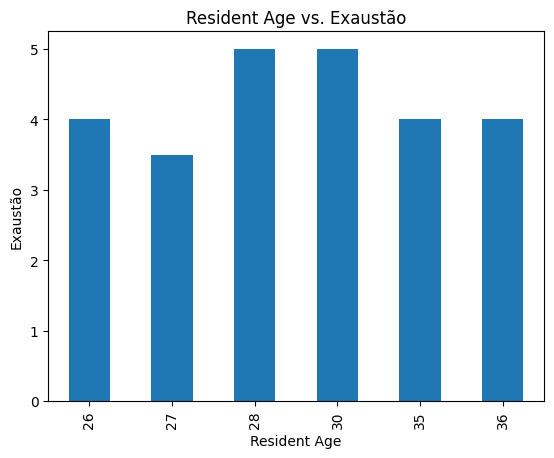

In [ ]:
avg = df.groupby("Age")['Exaustão'].mean()
avg.plot.bar()

plt.xlabel('Resident Age')
plt.ylabel('Exaustão')
plt.title('Resident Age vs. Exaustão')




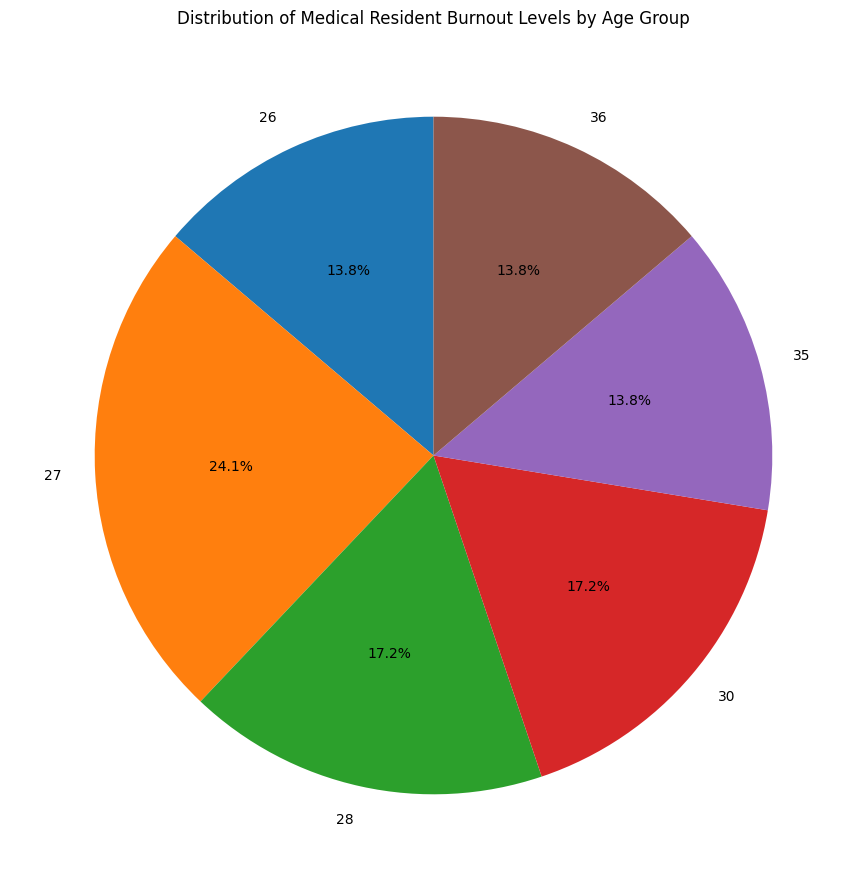

In [ ]:
#DataFrame

# 1. Group data by age and calculate total 'Exaustão' for each age group
age_burnout = df.groupby('Age')['Exaustão'].sum()

# 2. Create the pie chart
plt.figure(figsize=(11, 11))  # Adjust figure size as needed
plt.pie(age_burnout, labels=age_burnout.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Medical Resident Burnout Levels by Age Group')
plt.show()
